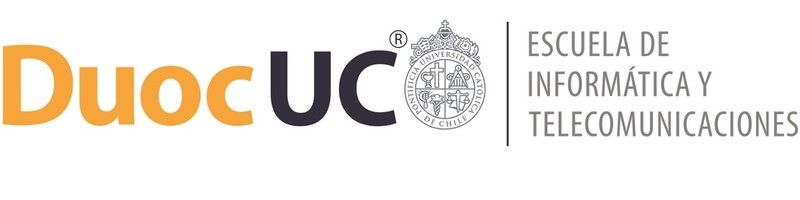

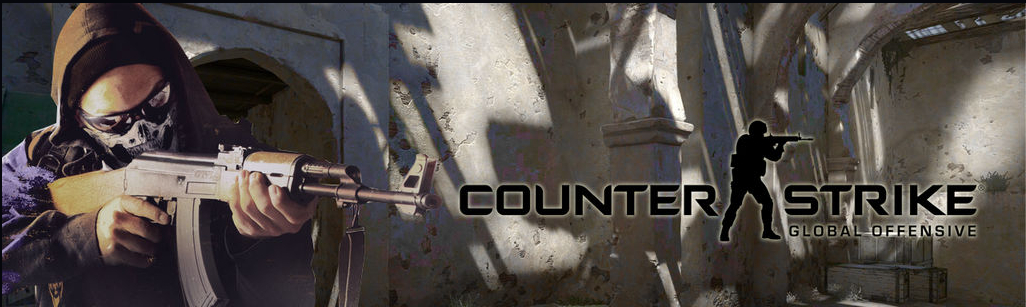

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
- Sebastián Carrera.
- Yasna Villarroel.
- Kevin Vivanco.

Docente:
- Giocrisrai Godoy Bonillo

Sección: 003V

# Caso Fundamentos de Machine Learning

## **1.1 CONTEXTO DE NEGOCIO**
### **1.1.1 Descripción del Juego**

*   Valve, una empresa líder en la industria de los videojuegos, ha contactado a nuestro equipo de análisis de datos y modelado de Machine Learning para analizar y desarrollar modelos predictivos basados en datos de partidas de Counter-Strike: Global Offensive (CS:GO).
*   CS:GO es un juego de disparos en primera persona (FPS) táctico y competitivo, donde dos equipos de cinco jugadores se enfrentan. Estos equipos se denominan Terroristas (T) y Contra-Terroristas (CT).
*   En cada ronda, los equipos tienen objetivos distintos:
#####🔹 **Terroristas (T):** El principal objetivo de los Terroristas es plantar una bomba (denominada "C4") en uno de los dos sitios de bomba designados dentro del mapa. Una vez plantada, la bomba tiene un temporizador de 45 segundos antes de explotar.
#####🔹 **Contra-Terroristas (CT):** El objetivo de los Contra-Terroristas es evitar que los Terroristas planten la bomba. Si la bomba es plantada, los CT deben desactivarla antes de que explote. También pueden ganar la ronda eliminando a todos los jugadores Terroristas.
*   El juego se caracteriza por su economía, donde los jugadores ganan dinero en el juego por acciones como eliminar enemigos, ganar rondas o plantar/desactivar la bomba. Este dinero se utiliza para comprar armas, armaduras y equipamiento al comienzo de cada ronda. Las decisiones sobre qué comprar y cuándo pueden ser cruciales para el éxito.
*   Las partidas se dividen en rondas, y el primer equipo en alcanzar un número determinado de rondas ganadas gana la partida. Los equipos cambian de bando (T a CT o viceversa) a la mitad de la partida.

### **1.1.2 Cliente**
*   Valve Corporation
*   Valve es el desarrollador y distribuidor de CS:GO, así como el operador de la plataforma de distribución digital de videojuegos Steam.
*   Valve busca utilizar el análisis de datos y el modelado de Machine Learning para obtener información valiosa sobre el juego, lo que les permite tomar decisiones informadas sobre:
#####🔹 El equilibrio del juego
#####🔹 El diseño de mapas
#####🔹 El desarrollo de nuevas características
#####🔹 La experiencia del jugador en general

### **1.1.3 Datos Disponibles**
*   Los datos que se proporcionarán para el análisis corresponden a un conjunto de más de 7000 partidas de CS:GO. Cada partida involucra un máximo de 10 jugadores (5 por equipo).
*   La información se ha extraído de archivos de repetición (replays) de CS:GO. Los replays son archivos propietarios que contienen un registro detallado de cada acción realizada por cada jugador durante una partida. Esto incluye movimientos, disparos, compras, uso de equipamiento, etc.
*   Los replays han sido procesados y extraídos utilizando un "scrapper" (una herramienta que automatiza la extracción de datos) y luego preprocesados utilizando un script para limpiar y estructurar los datos.
*   El conjunto de datos final se presenta en formato CSV (Comma Separated Value), que es un formato tabular común para el almacenamiento y análisis de datos.
*   El dataset contiene 79.157 filas, donde cada fila corresponde a las acciones y el rendimiento de un jugador individual dentro de una ronda específica de una partida.
*   El dataset incluye 29 columnas que representan diversas variables que describen las acciones, el rendimiento y el contexto de cada jugador dentro del juego. Estas variables incluyen:
#####🔹**Información de la partida y la ronda** (e.g., Map, MatchId, RoundId)
#####🔹 **Información del equipo** (e.g., Team, InternalTeamId)
#####🔹 **Rendimiento del jugador** (e.g., Kills, Assists, Headshots, TimeAlive, TravelledDistance)
#####🔹 **Equipamiento** (e.g., RoundStartingEquipmentValue, TeamStartingEquipmentValue, PrimaryXXXX)
#####🔹 **Resultados** (e.g., RoundWinner, MatchWinner, Survived)
#####🔹 **Acciones** (e.g., RLethalGrenadesThrown, RNonLethalGrenadesThrown, FlankKills)

*   **Contexto:** El dataset proporciona una visión completa y detallada de las acciones de los jugadores en las partidas de CS:GO, lo que permite analizar diversos aspectos del juego, como el rendimiento individual, las estrategias de equipo y los factores que influyen en el resultado de las partidas.

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

## Objetivo del proyecto

El objetivo de este proyecto es analizar los datos de las partidas del videojuego Counter Strike: GO con el fin de afirmar o descartar las hipótesis planteadas a continuación.

#Obj de clasificación global

1.3.1 Clasificación: ¿Se puede predecir si un jugador sobrevivirá la ronda?
Descripción:

Desarrollar un modelo de clasificación que, utilizando variables del desempeño del jugador y el contexto de la ronda, prediga si un jugador sobrevivirá o no la ronda.
Variables relevantes:

🔹 Survived: Sobrevivencia en la ronda.
🔹 RoundKills: Cantidad de enemigos eliminados por el jugador en la ronda.
🔹 RoundHeadshots: Cantidad de tiros a la cabeza realizados por el jugador en la ronda.
🔹 RoundStartingEquipmentValue: Valor del equipamiento del jugador al inicio de la ronda.
Hipótesis:

"La probabilidad de que un jugador sobreviva una ronda depende del valor de su equipamiento inicial y de su capacidad para eliminar enemigos durante la ronda."


## Fase 2: Data Understanding

In [1]:
import pandas as pd
import numpy as np


from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

# Leer el CSV usando punto y coma como separador
df = pd.read_csv(name, sep=";")


Saving csgo_datos_corregidos.csv to csgo_datos_corregidos.csv


#mapa de correlacion

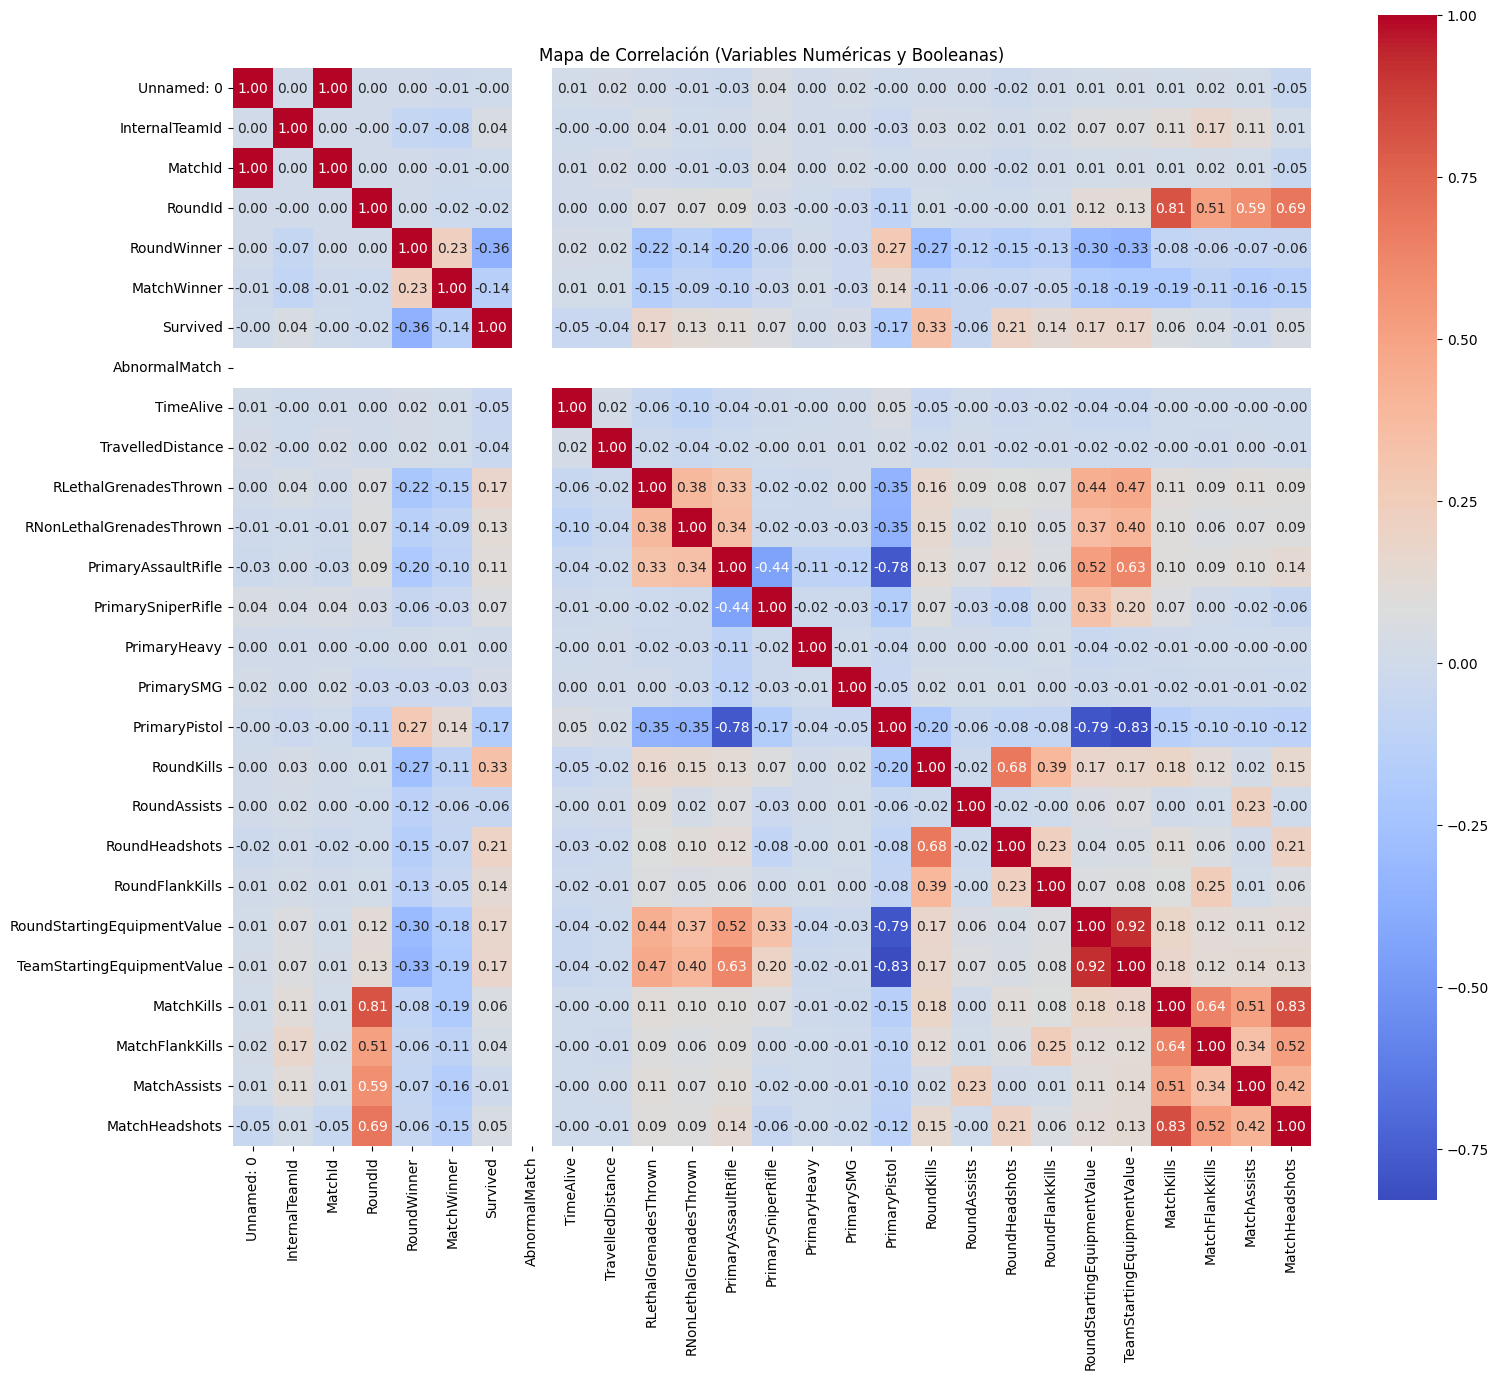

In [4]:
# Crear un mapa de calor de correlaciones entre todas las variables numéricas y booleanas,
# centrado en ver la relación con la variable objetivo 'Survived'
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas y booleanas
numeric_df = df.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación completa
correlation_matrix = numeric_df.corr()

# Generar mapa de calor completo
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Mapa de Correlación (Variables Numéricas y Booleanas)")
plt.tight_layout()
plt.show()


In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Extraemos la correlación con la variable objetivo
target_corr = correlation_matrix['Survived'].drop('Survived')

# Filtramos las variables con correlación absoluta mayor a un umbral
relevant_features = target_corr[abs(target_corr) > 0.1].index.tolist()

# Incluimos también la variable objetivo
relevant_features.append('Survived')

# Creamos el nuevo DataFrame filtrado
df_corr = df[relevant_features]

print(f"Variables seleccionadas: {relevant_features}")
df_corr.head()

Variables seleccionadas: ['RoundWinner', 'MatchWinner', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimaryPistol', 'RoundKills', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'Survived']


,RoundWinner,MatchWinner,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimaryPistol,RoundKills,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,Survived
0,False,True,0,4,0.0,1,0,0,0,750,4400,False
1,False,True,0,0,0.0,1,0,0,0,800,4400,False
2,False,True,0,0,0.0,1,0,0,0,1000,4400,False
3,False,True,0,0,0.0,1,0,0,0,850,4400,False
4,False,True,1,1,0.0,1,0,0,0,1000,4400,True


Variables relevantes


RoundWinner, MatchWinner, RLethalGrenadesThrown, RNonLethalGrenadesThrown,
PrimaryAssaultRifle, PrimaryPistol, RoundKills, RoundHeadshots, Survived, RoundFlankKills, RoundStartingEquipmentValue, TeamStartingEquipmentValue

In [2]:
#Dataframe con las columnas relevantes
selected_features = [
    'RoundWinner',
    'MatchWinner',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'PrimaryAssaultRifle',
    'PrimaryPistol',
    'RoundKills',
    'RoundHeadshots',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue',
    'Survived'
]

df_corr = df[selected_features].copy()

#Eliminar variables

#Eliminada por alta colinealidad con RoundTeamStartingEquipmentValue
df_corr = df_corr.drop(columns=['TeamStartingEquipmentValue'])

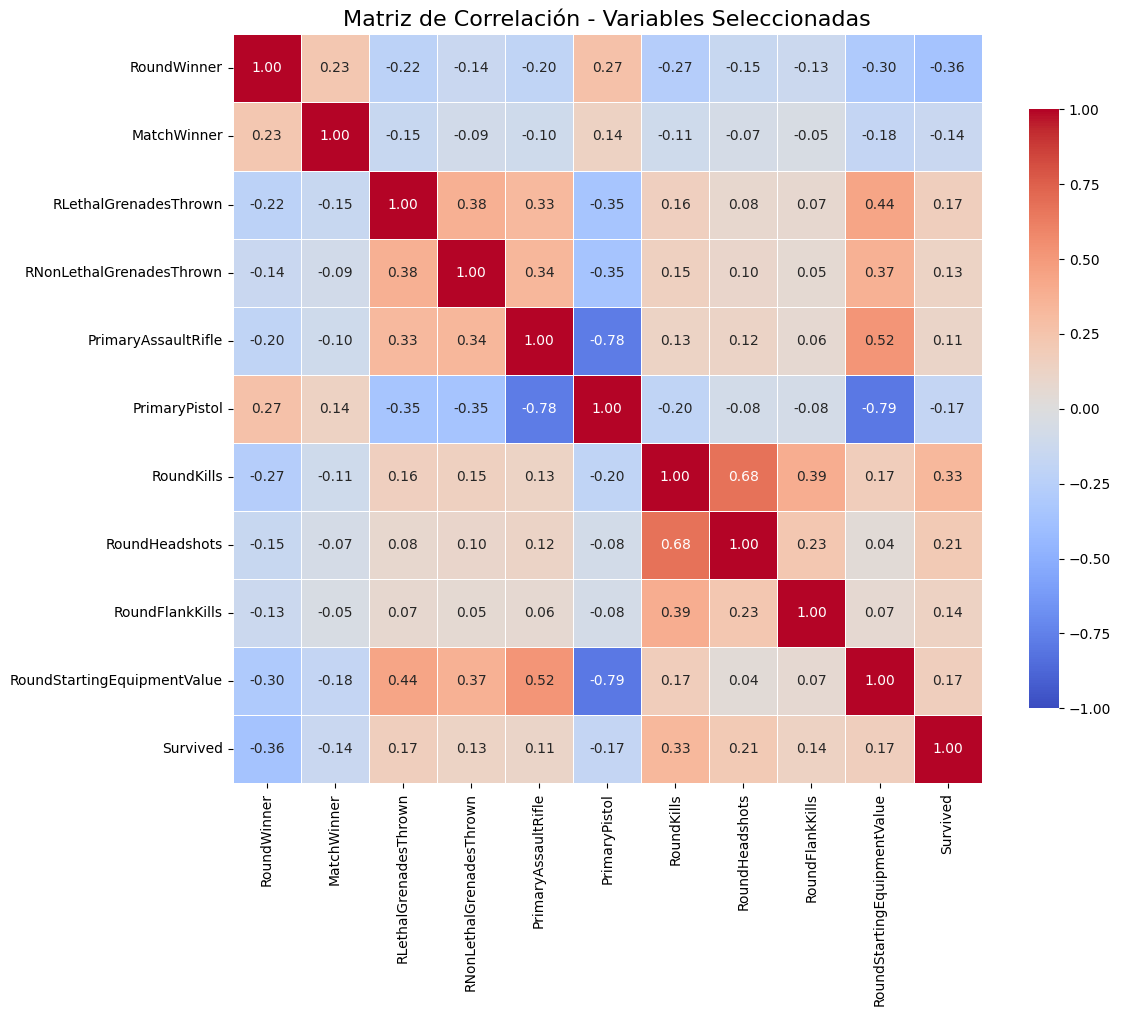

In [5]:
# Calculamos la matriz de correlación
corr_matrix = df_corr.corr()

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Dibujamos el heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title("Matriz de Correlación - Variables Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

#Modelo árbol de decisiones



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df[['RoundKills', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
        'RLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimaryPistol', 'RoundWinner']]
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento
dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt_model.predict(X_test)


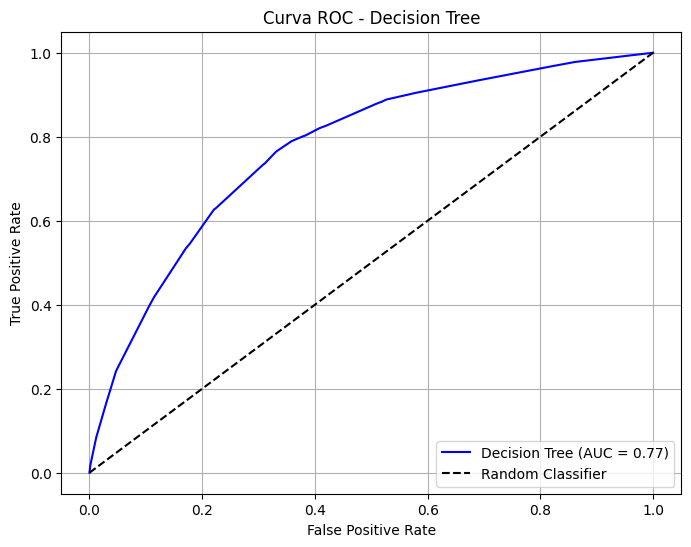

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de clase positiva
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
roc_auc = roc_auc_score(y_test, y_proba_dt)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [7]:
print("Matriz de Confusión (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

print("\nReporte de Clasificación (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("\nPrecisión general:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Matriz de Confusión (Decision Tree):
[[9506 4710]
 [2242 7290]]

Reporte de Clasificación (Decision Tree):
              precision    recall  f1-score   support

       False       0.81      0.67      0.73     14216
        True       0.61      0.76      0.68      9532

    accuracy                           0.71     23748
   macro avg       0.71      0.72      0.70     23748
weighted avg       0.73      0.71      0.71     23748


Precisión general:
Accuracy: 0.7072595586996799


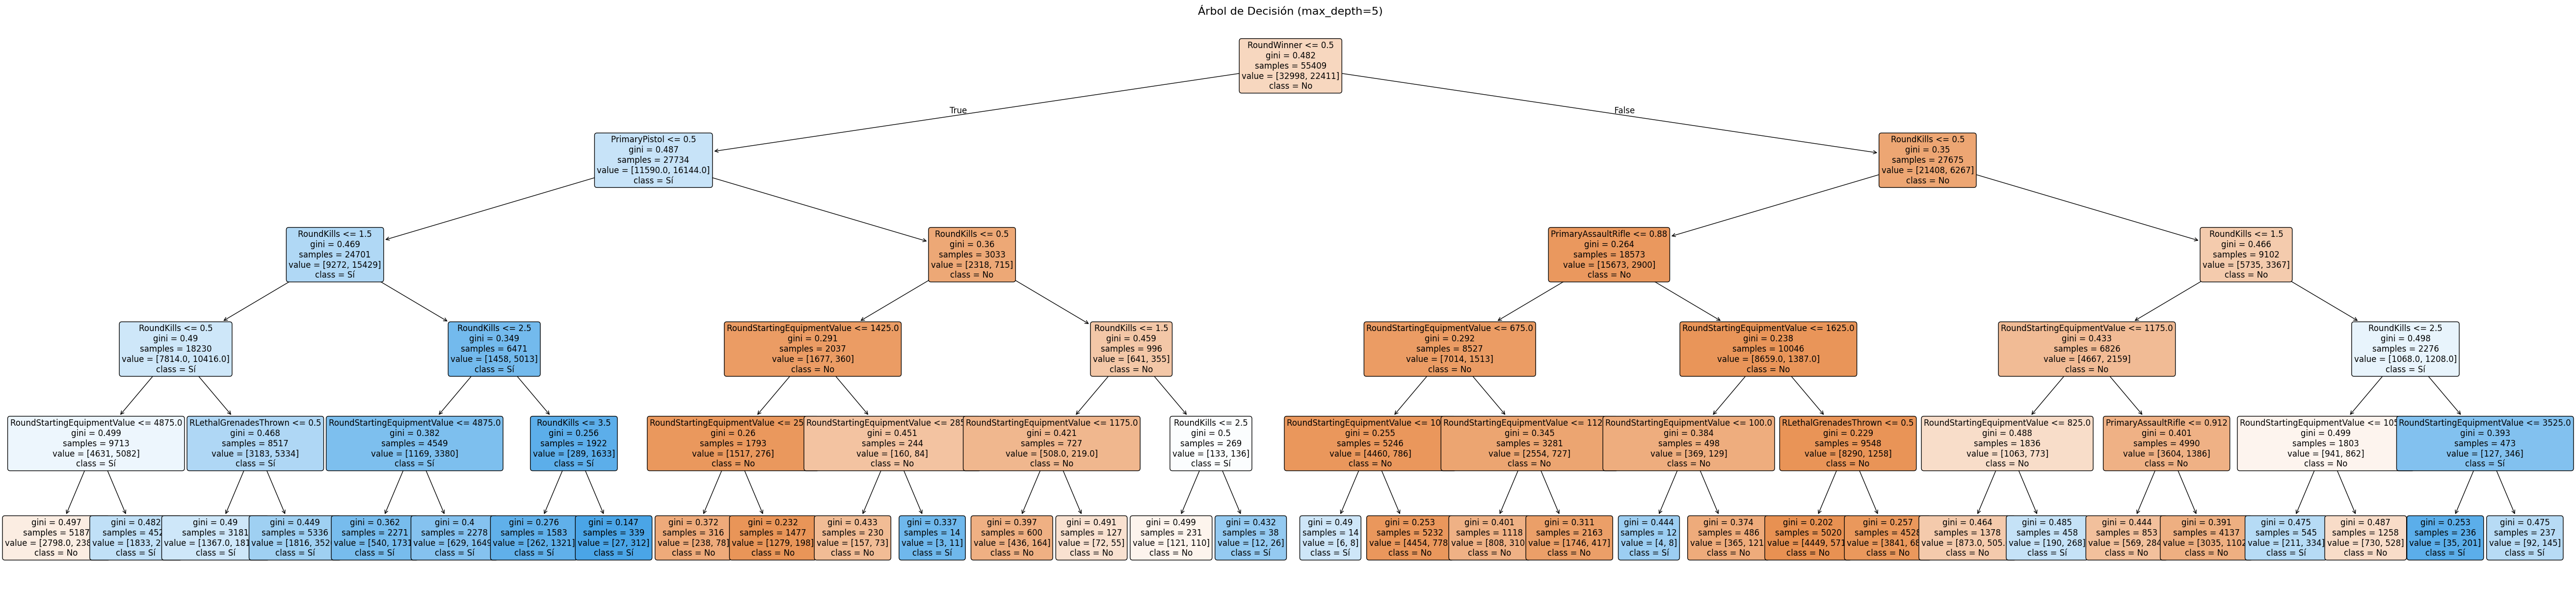

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(67, 15))  # Ajusta tamaño para buena legibilidad
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No', 'Sí'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Árbol de Decisión (max_depth=5)", fontsize=16)
plt.show()
